<a href="https://colab.research.google.com/github/NurayVakitbilir/HW2/blob/master/Vakitbilir_malaria_cell_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [0]:
!pip install -q kaggle

In [3]:
import json
import zipfile
import os
!mkdir -p /root/.kaggle

api_token = {"username":"nurayvakitbilir",
             "key":"1a09c6ec80b6d78251d7973639269745"}

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

!chmod 600 /root/.kaggle/kaggle.json
!kaggle config set -n path -v /root/.kaggle

- path is now set to: /root/.kaggle


In [4]:
!kaggle datasets download iarunava/cell-images-for-detecting-malaria

cell-images-for-detecting-malaria.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!ls /root/.kaggle/datasets/iarunava/cell-images-for-detecting-malaria

cell-images-for-detecting-malaria.zip


In [6]:
!unzip /root/.kaggle/datasets/iarunava/cell-images-for-detecting-malaria/cell-images-for-detecting-malaria.zip
#!find . -name '*.png'

Archive:  /root/.kaggle/datasets/iarunava/cell-images-for-detecting-malaria/cell-images-for-detecting-malaria.zip
replace cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


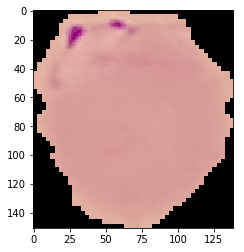

In [7]:
img = plt.imread('./cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png')
plt.imshow(img)

In [0]:
infect = os.listdir('./cell_images/Parasitized/')
uninfect = os.listdir('./cell_images/Uninfected/')

In [9]:
import cv2
import seaborn as sns
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

Using TensorFlow backend.


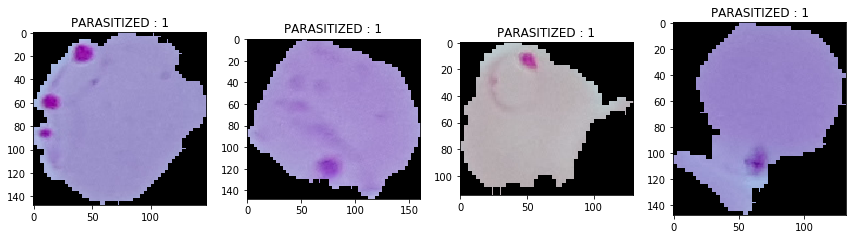

In [10]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('./cell_images/Parasitized' + "/" + infect[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

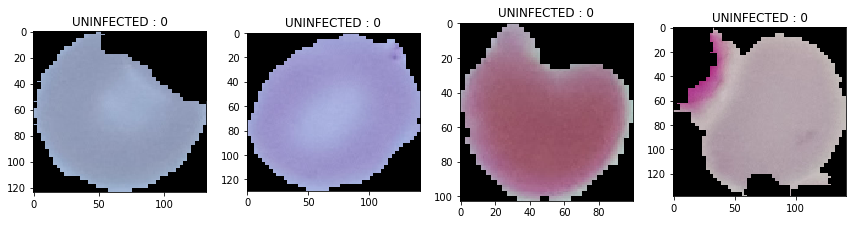

In [11]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('./cell_images/Uninfected/' + "/" + uninfect[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

In [0]:
data = []
labels = []

for i in infect:
    try:
        image = cv2.imread("./cell_images/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        data.append(np.array(resize_img))
        labels.append(1)
    except:
        None   
for u in uninfect:
    try:
        image = cv2.imread("./cell_images/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        data.append(np.array(resize_img))
        labels.append(0)
    except:
        None

In [0]:
cells = np.array(data)
labels = np.array(labels)
cells = cells/255
np.save('Cells' , cells)
np.save('Labels' , labels)

In [14]:
print('Cells : {} | labels : {}'.format(cells.shape , labels.shape))

Cells : (27558, 50, 50, 3) | labels : (27558,)


In [0]:
n = np.arange(cells.shape[0])
np.random.shuffle(n)
cells = cells[n]
labels = labels[n]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cells, labels, test_size = 0.3, random_state = 50)

In [0]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [0]:
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization, Activation 
from keras.models import Sequential
from keras import backend as K
from keras.optimizers import Adam

In [19]:
def CNNbuild():
    model = Sequential()
            
    model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(50, 50, 3)))
    model.add(BatchNormalization())    
    model.add(Dropout(1))
    
    model.add(Flatten())
    model.add(Dense(32, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(1.5))
    model.add(Dense(2, activation = 'sigmoid'))
    
    return model

model = CNNbuild()
model.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
h = model.fit(X_train, y_train, epochs = 20, batch_size = 32,  validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 15432 samples, validate on 3858 samples
Epoch 1/20
15432/15432 [==============================] - 115s 7ms/step - loss: 0.6086 - acc: 0.6796 - val_loss: 0.6135 - val_acc: 0.6713
Epoch 2/20
15432/15432 [==============================] - 114s 7ms/step - loss: 0.5696 - acc: 0.7113 - val_loss: 1.0685 - val_acc: 0.5045
Epoch 3/20
15432/15432 [==============================] - 114s 7ms/step - loss: 0.5345 - acc: 0.7373 - val_loss: 0.7622 - val_acc: 0.6406
Epoch 4/20
15432/15432 [==============================] - 114s 7ms/step - loss: 0.4276 - acc: 0.8078 - val_loss: 1.6854 - val_acc: 0.5765
Epoch 5/20
15432/15432 [==============================] - 114s 7ms/step - loss: 0.3050 - acc: 0.8778 - val_loss: 0.6871 - val_acc: 0.6498
Epoch 6/20
15432/15432 [==============================] - 113s 7ms/step - loss: 0.2266 - acc: 0.9134 - val_loss: 0.6222 - val_acc: 0.7706
Epoch 7/20
15432/15432 [==============================] - 114s 7ms/step - l

In [21]:
accuracy = model.evaluate(X_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:', accuracy[1])

8268/8268 [==============================] - 17s 2ms/step

 Test_Accuracy:- 0.8466376390616329


In [32]:
from keras.applications import VGG16
base_model = VGG16(include_top=False, 
                      weights='imagenet', 
                      input_shape=(50, 50, 3))
base_model.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
tmodel= Sequential()           
tmodel.add(base_model)                
tmodel.add(Flatten())                                
tmodel.add(Dense(32, activation = 'relu'))
tmodel.add(BatchNormalization())
tmodel.add(Dropout(1.5))
tmodel.add(Dense(2, activation = 'sigmoid'))

In [0]:
tmodel.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [39]:
his = tmodel.fit(X_train,y_train,batch_size=32, epochs= 5, validation_split=0.2)

Train on 15432 samples, validate on 3858 samples
Epoch 1/5
15432/15432 [==============================] - 495s 32ms/step - loss: 0.3102 - acc: 0.8706 - val_loss: 0.3366 - val_acc: 0.8552
Epoch 2/5
15432/15432 [==============================] - 496s 32ms/step - loss: 0.2695 - acc: 0.8909 - val_loss: 0.2782 - val_acc: 0.8821
Epoch 3/5
15432/15432 [==============================] - 494s 32ms/step - loss: 0.2605 - acc: 0.8941 - val_loss: 0.2698 - val_acc: 0.8849
Epoch 4/5
15432/15432 [==============================] - 493s 32ms/step - loss: 0.2502 - acc: 0.8992 - val_loss: 0.2869 - val_acc: 0.8779
Epoch 5/5
15432/15432 [==============================] - 498s 32ms/step - loss: 0.2494 - acc: 0.8995 - val_loss: 0.3691 - val_acc: 0.8489


In [40]:
accuracy = tmodel.evaluate(X_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:', accuracy[1])

8268/8268 [==============================] - 213s 26ms/step

 Test_Accuracy: 0.8427068214804064
